## 作業:
課程範例以 訓練資料集來檢視，先看一下測試資料特性，再把測試資料集和訓練資料集合併，並回答下列問題，   
目的:讓大家熟悉對應這樣的問題，我們要提取怎樣的函數來進行計算。   

* Q1: 觀察測試(test)資料集和訓練(Train)資料集的變數的差異性?
* Q2: 測試資料集是否有遺失值?
* Q3: 從合併資料選取一個變數，嘗試去做各種不同遺失值的處理，並透過圖形或數值來做輔助判斷，補值前與後的差異，你覺得以這個變數而言，試著說明每一個方法的差異。   


In [4]:
#把需要的 library import 進來
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

from IPython.display import display
#讓圖可以在 jupyter notebook顯示
%matplotlib inline


# 把兩個訓練資料集和測試資料集讀進來
df_test = pd.read_csv('Titanic_test.csv')
df_train = pd.read_csv('Titanic_train.csv')

#印出前幾筆看資料的狀態
print('The first five records of Titanic test data ')
display(df_test.head(5))
print()
print('The first five records of Titanic train data ')
display(df_train.head(5))
print()

women = df_train.loc[df_train.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)
print("% of women who survived:", rate_women)
men = df_train.loc[df_train.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)
print("% of men who survived:", rate_men)

y = df_train["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(df_train[features])
X_test = pd.get_dummies(df_test[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")



#顯示圖形的函數，可不先不用理解，直接用
from IPython.display import display
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)
   


The first five records of Titanic test data 


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S



The first five records of Titanic train data 


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



% of women who survived: 0.7420382165605095
% of men who survived: 0.18890814558058924
Your submission was successfully saved!


## Q1: 判斷 測試資料集和訓練資料集欄位變數是否有差異性?

In [ ]:
# Q1: 判斷 測試資料集和訓練資料集欄位變數是否有差異性?
Answer： Test的資料及沒有'Survived'。

## A1 : Test 資料集沒有 'Survived'

## Q2: 測試資料集是否有遺失值?

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

from IPython.display import display
#讓圖可以在 jupyter notebook顯示
%matplotlib inline

#可以嘗試用範例的程式
# 資料的比數

#產生一個不重覆的資料集，透過 drop_duplicates 函數
nodup_df_train=df_train.drop_duplicates(subset=None, keep='first', inplace=False)

if nodup_df_train.shape[1]==df_train.shape[1]:
 print("no duplicates")
else :
    print('顯示train data是否有重複顯示的資料')
    df_train.duplicated()
    
#判斷每一個資料點，是否為空值:
print('判斷每一個資料點，是否為空值:')
print(df_train.isnull().head(5))
print()


# 会判断哪些”列”存在缺失值
# any：判斷一個tuple或者list是否全為空，0，False。如果全為空，0，False，則返回False；如果不全為空，則返回True。
print('会判断哪些”列”存在缺失值:')
print(df_train.isnull().any())
print()

# 統計 data 裡有空值的變數個數
print('統計 data 裡有空值的變數個數')
print(df_train.isnull().any().sum())
print()

# 當有些資料用 "null" 代表空值時，需要先做轉換，
df_train=df_train.replace('null',np.NaN)
# 統計 data 裡每一列是否有空值
print('統計 data 裡每一列是否有空值')
print(df_train.isnull().any())
print()

# 統計 data 裡有空值的變數個數
print('統計 data 裡有空值的變數個數')
print(df_train.isnull().any().sum())
print()



no duplicates
判斷每一個資料點，是否為空值:
   PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0        False     False   False  False  False  False  False  False   False   
1        False     False   False  False  False  False  False  False   False   
2        False     False   False  False  False  False  False  False   False   
3        False     False   False  False  False  False  False  False   False   
4        False     False   False  False  False  False  False  False   False   

    Fare  Cabin  Embarked  
0  False   True     False  
1  False  False     False  
2  False   True     False  
3  False  False     False  
4  False   True     False  

会判断哪些”列”存在缺失值:
PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

統計 data 裡有空值的變數個數
2

統計 data 裡每一列是否有空值
Passeng

## Q3: 從合併資料選取一個變數，嘗試去做各種不同遺失值的處理，並透過圖形來做輔助判斷，補值前與後的差異，你覺得以這個變數而言，試著說明每一個方法的差異。   

我們以  Age 為例，進行補植，補固定值

補值之前的平均值如下:
29.699117647058763
13.002015226002884

補值之後的平均值如下:
29.699117647058763
13.002015226002884


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


圖形中高點的位置，就是平均數的位置


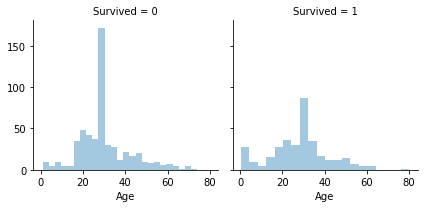

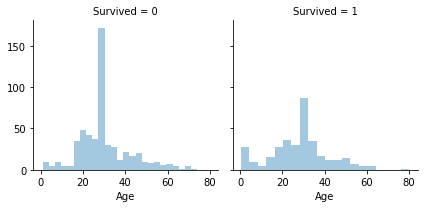

In [22]:
#合併資料
# 我們以  Age 為例，進行補植，補固定值
#補值前 平均值
print('我們以  Age 為例，進行補植，補固定值')
print()
print('補值之前的平均值如下:')
print(df_train['Age'].mean()) #age平均
print(df_train['Age'].std()) #age標準差
# 連續型用分布圖行來看
g = sns.FacetGrid(df_train, col='Survived')
g.map(sns.distplot, 'Age', kde=False)
print()

#補值後
print('補值之後的平均值如下:')
df_train['Age']=df_train['Age'].fillna(0)
print(df_train['Age'].mean())
print(df_train['Age'].std()) #age標準差
df_train[df_train['Age'].isnull().values==True]
#補完就沒有遺失值了，但是看到這樣的補值效果，平均值上有很明顯的差異，
# 連續型用分布圖行來看
g = sns.FacetGrid(df_train, col='Survived')
g.map(sns.distplot, 'Age', kde=False)

print('圖形中高點的位置，就是平均數的位置')



以Age為例，由前往後補值
補值之前的平均值
29.69911764705882
14.526497332334044

補值之後的平均值
29.699117647058763
13.002015226002884



C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


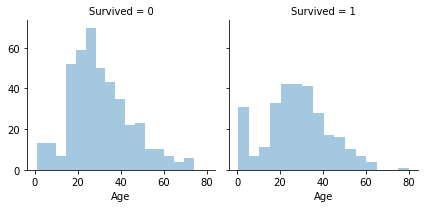

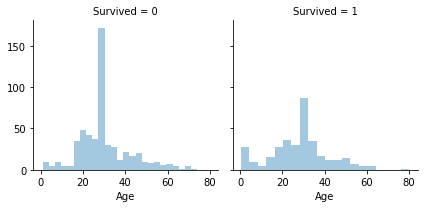

In [28]:
# 我們以  Age 為例，進行補植，補平均數
#補值前 平均值

print('以Age為例，由前往後補值')
df_train = pd.read_csv("Titanic_train.csv")
print('補值之前的平均值')
print(df_train['Age'].mean())
print(df_train['Age'].std()) #age標準差
print()

# 連續型用分布圖行來看

g = sns.FacetGrid(df_train, col='Survived')
g.map(sns.distplot, 'Age', kde=False)
#補值後
print('補值之後的平均值')
df_train['Age']=df_train['Age'].fillna(df_train['Age'].mean())
print(df_train['Age'].mean())
print(df_train['Age'].std()) #age標準差
print()
df_train[df_train['Age'].isnull().values==True]
#補平均數，平均數上沒有差異性，標準差接近
# 連續型用分布圖行來看


g = sns.FacetGrid(df_train, col='Survived')
g.map(sns.distplot, 'Age', kde=False)

我們以  Age 為例，進行，由後往前補
29.69911764705882
14.526497332334044
29.581560044893376
14.554589813600963


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


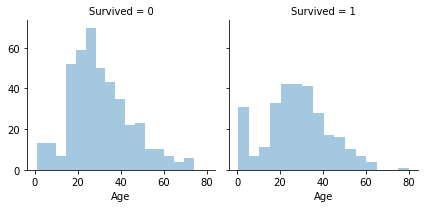

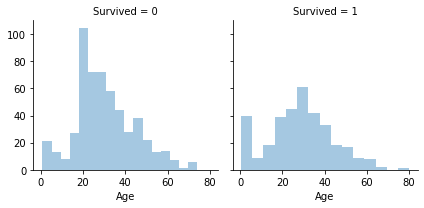

In [30]:
# 我們以  Age 為例，進行，由後往前補
#補值前 平均值
print('我們以  Age 為例，進行，由後往前補')
df_train = pd.read_csv("Titanic_train.csv")
print(df_train['Age'].mean())
print(df_train['Age'].std()) #age標準差
# 連續型用分布圖行來看
g = sns.FacetGrid(df_train, col='Survived')
g.map(sns.distplot, 'Age', kde=False)
#補值後
df_train['Age']=df_train['Age'].fillna(method='pad')
print(df_train['Age'].mean())
print(df_train['Age'].std()) #age標準差
df_train[df_train['Age'].isnull().values==True]
#補平均數，平均數上沒有差異性，標準差接近
# 連續型用分布圖行來看
g = sns.FacetGrid(df_train, col='Survived')
g.map(sns.distplot, 'Age', kde=False)

In [14]:
# 以 XXX 為例，先看 Cabin  出現值的特性

